## Forecasting Model

C:\Users\SHAURYA\AppData\Local\Temp\ipykernel_29560\2505241892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])  # Ensure datetime format
13:10:32 - cmdstanpy - INFO - Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing


MAE: 0.08821043048618796
MSE: 0.012255308872616184
RMSE: 0.11070369854985056


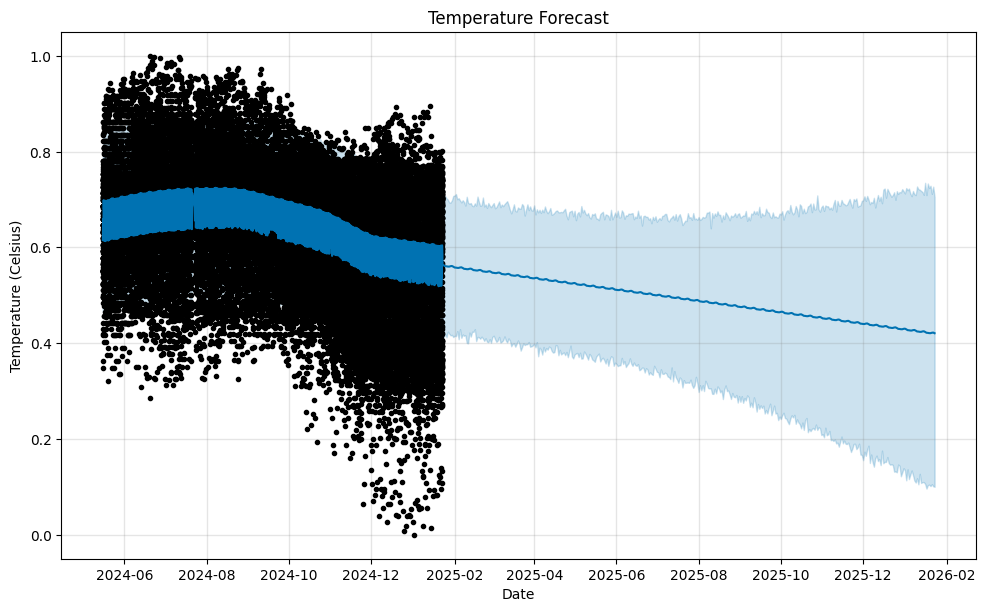

In [16]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load cleaned data
data = pd.read_csv(r'C:\users\shaurya\Downloads\weather_forecasting_project\data\processed\cleaned_weather_data.csv')

# Prepare data for Prophet
df = data[['last_updated', 'temperature_celsius']]
df.columns = ['ds', 'y']  # Rename columns for Prophet
df['ds'] = pd.to_datetime(df['ds'])  # Ensure datetime format

# Fit Prophet model
model = Prophet()
model.fit(df)

# Forecast future
future = model.make_future_dataframe(periods=365)  # Forecast for the next year
forecast = model.predict(future)

# Align predictions to historical timestamps
forecast_historical = forecast.set_index('ds').loc[df['ds']]  # Match predictions to historical timestamps
y_true = df['y']  # Original temperature values
y_pred = forecast_historical['yhat'].values  # Predicted values for the matched timestamps

# Ensure lengths match
if len(y_true) != len(y_pred):
    raise ValueError(f"Length mismatch after alignment: y_true={len(y_true)}, y_pred={len(y_pred)}")

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot forecast
fig = model.plot(forecast)
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()
